<a href="https://colab.research.google.com/github/Vedikaaa-737/SKILL/blob/main/LCA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#UNZIP AND EXTRACT THE DATASET

import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/DATASCIENCE LCA3 DATASET.zip'
extract_path = '/content/bot_iot_data'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
print("Extracted files:")
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


Extracted files:
/content/bot_iot_data/reduced_data_3.csv
/content/bot_iot_data/reduced_data_1.csv
/content/bot_iot_data/reduced_data_4.csv
/content/bot_iot_data/reduced_data_2.csv


In [2]:
#LOAD THE DATASET

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/bot_iot_data/reduced_data_1.csv')

df.head()


<ipython-input-2-5ae8d1a83f77>:6: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/bot_iot_data/reduced_data_1.csv')


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


In [3]:
#DATA OBSERVATION

print(df.info())
print(df.describe())
print("Null values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   pkSeqID                           1000000 non-null  int64  
 1   stime                             1000000 non-null  float64
 2   flgs                              1000000 non-null  object 
 3   flgs_number                       1000000 non-null  int64  
 4   proto                             1000000 non-null  object 
 5   proto_number                      1000000 non-null  int64  
 6   saddr                             1000000 non-null  object 
 7   sport                             1000000 non-null  object 
 8   daddr                             1000000 non-null  object 
 9   dport                             1000000 non-null  object 
 10  pkts                              1000000 non-null  int64  
 11  bytes                             1000

In [4]:
#DATA CLEANING


import pandas as pd
import numpy as np

# Drop columns with all nulls
df.dropna(axis=1, how='all', inplace=True)

# Replace inf/-inf with NaN then fill or drop
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values
df.dropna(inplace=True)

# Optionally reset index
df.reset_index(drop=True, inplace=True)


In [5]:
#ENCODE CATEGORICAL VARIABLES

from sklearn.preprocessing import LabelEncoder

# Assuming 'category' and 'subcategory' are categorical columns
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])
df['subcategory'] = encoder.fit_transform(df['subcategory'])


In [8]:
# Show columns with non-numeric data types
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state'], dtype='object')


In [3]:
#DROP COLUMNS

df_numeric = df.drop(columns=['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state'])

In [5]:
# Drop target columns temporarily
target_cols = ['attack', 'category', 'subcategory']
X = df_numeric.drop(columns=target_cols)
y = df_numeric[target_cols]


In [6]:
#TO MAKE SURE X IS FULLY NUMERIC

X = X.apply(pd.to_numeric, errors='coerce')  # force non-numeric to NaN
X = X.dropna()  # drop rows with NaN after conversion


In [7]:
#SCALE THE FEAUTURES

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


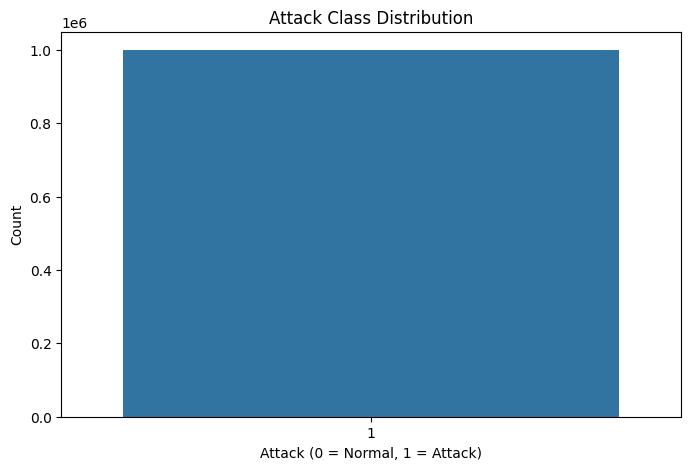

In [8]:
#DATA VISUALIZATION
#CLASS DISTRIBUTION

import seaborn as sns
import matplotlib.pyplot as plt

# Attack column distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['attack'])
plt.title('Attack Class Distribution')
plt.xlabel('Attack (0 = Normal, 1 = Attack)')
plt.ylabel('Count')
plt.show()



In [9]:
#FEATURE SELECTION
#FILTER METHOD

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 20 features (you can tune this number)
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_scaled, y['attack'])

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP',
       'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [10]:
#SPLIT THE DATA

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y['attack'], test_size=0.2, random_state=42)


In [11]:
#TRAIN THE MODEL
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
#EVALUATE THE MODEL

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Using RF as an example
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    200000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Confusion Matrix:
 [[200000]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
